# Assignment 10

### 1.复习上课内容

### 2. 回答一下理论题目

#### 1. What is independent assumption in Naive bayes ?

ans:在推导朴素贝叶斯公式时，计算P(a1,a2,a3|b)的概率,假设特征a1,a2,a3是相互独立的，则可以近似变为P(a1|b)*P(a2|b)*P(a3|b)

#### 2. What is MAP(maximum a posterior) and ML(maximum likelihood) ?

ans:

MAP(maximum a posterior):最大后验概率MAP=argmax P(h|D) = argmax P(D|h)P(h),即在给定的数据集中有很多拟合数据集D的线性函数h，选出最可能拟合的D的函数h的概率为MAP。

ML(maximum likelihood):ML=argmax P(D|h),找一个函数可以最大程度拟合数据集D的概率,假设找所有函数h的概率是相等的，不像MAP是有偏好的，所以可以可以把MAP中的P(h)去掉得到ML。

#### 3. What is support vector in SVM?

ans:support vector是在边界上的向量，对边界有贡献的向量。经过计算后，样本中alpha大于0的点。

#### 4. What is the intuition behind SVM ?

ans:SVM是找到一个最优的分界线，这个最优的分界线可以把两个类别分的更开，即使得两个分类的边界距离最大的分界线就是SVM算法思想

#### 5. Shortly describ what 'random' means in random forest ?

ans:在对一个多feature的分类任务使用随机森林时，1.随机的初始化样本，2.随机的选取teature进行建树

#### 6. What cariterion does XGBoost use to find the best split point in a tree ?

ans:计算所有叶子结点的权重，并用该权重计算分割点的损失函数，损失函数最小的点即为需要分割的点。

### 3. Practial part

### Problem description: In this part you are going to build a classifier to detect if a piece of news is published by the Xinhua news agency (新华社）.

#### Hints:

#### 1. Firstly, you have to come up with a way to represent the news. (Vectorize the sentence, you can find different ways to do so online)  

In [5]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
import numpy as np

In [12]:
filename = 'D:/Repos/MyPython/Nlp/sqlResult_1558435.csv'
content = pd.read_csv(filename, encoding='gb18030')
content.head()

,id,author,source,content,feature,title,url
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,NaN,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,NaN,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...


In [13]:
#移除多余列
content = content.drop(columns=['id','author','feature','url'])

In [14]:
#添加新列：文章=标题+正文、结果
content.eval("""
article = title + content
target = source""", inplace=True)
content.head()

,source,content,title,article,target
0,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,小米MIUI 9首批机型曝光：共计15款,小米MIUI 9首批机型曝光：共计15款此外，自本周（6月12日）起，除小米手机6等15款机...,快科技@http://www.kkj.cn/
1,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,骁龙835在Windows 10上的性能表现有望改善,骁龙835在Windows 10上的性能表现有望改善骁龙835作为唯一通过Windows 1...,快科技@http://www.kkj.cn/
2,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,一加手机5细节曝光：3300mAh、充半小时用1天,一加手机5细节曝光：3300mAh、充半小时用1天此前的一加3T搭载的是3400mAh电池，...,快科技@http://www.kkj.cn/
3,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）这是6月18日在葡萄牙中部大佩德罗...,新华社
4,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随（原标题：44岁女子跑深圳约会网友被拒，暴雨...,深圳大件事


In [15]:
#处理目标，包含新华社的为1，不包含为0
content[u'target'] = content[u'target'].astype(str)
#无三元表达式，使用if else代替
content[u'target'] = content[u'target'].apply(lambda x :('1' if x.find("新华社") >= 0 else '0'))
content[u'target'] = content[u'target'].astype(int)
content.head()

,source,content,title,article,target
0,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,小米MIUI 9首批机型曝光：共计15款,小米MIUI 9首批机型曝光：共计15款此外，自本周（6月12日）起，除小米手机6等15款机...,0
1,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,骁龙835在Windows 10上的性能表现有望改善,骁龙835在Windows 10上的性能表现有望改善骁龙835作为唯一通过Windows 1...,0
2,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,一加手机5细节曝光：3300mAh、充半小时用1天,一加手机5细节曝光：3300mAh、充半小时用1天此前的一加3T搭载的是3400mAh电池，...,0
3,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）这是6月18日在葡萄牙中部大佩德罗...,1
4,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随（原标题：44岁女子跑深圳约会网友被拒，暴雨...,0


In [24]:
#移除文章中多余的换行符
content[u'article'] = content[u'article'].astype(str)
content[u'article'] = content[u'article'].apply(lambda x : x.replace('\r',''))
content[u'article'] = content[u'article'].apply(lambda x : x.replace('\n',''))
content[u'article'] = content[u'article'].apply(lambda x : x.replace('\u3000',''))
content[u'article'] = content[u'article'].apply(lambda x : x.replace('\\n',''))
content[u'article'] = content[u'article'].apply(lambda x : x.replace(' ',''))
content.head()

,source,content,title,article,target
0,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,小米MIUI 9首批机型曝光：共计15款,小米MIUI9首批机型曝光：共计15款此外，自本周（6月12日）起，除小米手机6等15款机型...,0
1,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,骁龙835在Windows 10上的性能表现有望改善,骁龙835在Windows10上的性能表现有望改善骁龙835作为唯一通过Windows10桌...,0
2,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,一加手机5细节曝光：3300mAh、充半小时用1天,一加手机5细节曝光：3300mAh、充半小时用1天此前的一加3T搭载的是3400mAh电池，...,0
3,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,葡森林火灾造成至少62人死亡政府宣布进入紧急状态（组图）这是6月18日在葡萄牙中部大佩德罗冈...,1
4,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,44岁女子约网友被拒暴雨中裸奔交警为其披衣相随（原标题：44岁女子跑深圳约会网友被拒，暴雨中...,0


In [25]:
#以下保存指定的列到新的csv文件，index=0表示不为每一行自动编号，header=1表示行首有字段名称
content.to_csv('news_fix.csv',columns=['article','target'],index=0,header=1,quoting=1)

In [23]:
content['content'].tolist()[-1].replace('\r','').replace('\n','').replace('\u3000','').replace('\\n','')

'新华社德国杜塞尔多夫６月６日电题：乒乓女球迷新华社记者王子江、张寒熊老师离开上海前，特意花一千多元买了一只张继科代言的球拍，准备在世界锦标赛期间他赢了比赛后，能在球拍上签个名。但没想到张继科在３２强赛中，输给了韩国的李尚洙。“拍子算是白拿过来了。”熊老师摇头，“就算是信仰充值了。”“信仰充值”是乒乓球粉丝圈非常流行的词汇，简单来说，就是为自己喜欢的明星或球队花钱。“熊老师”是这位２２岁的成都姑娘的“艺名”，“艺名”这一称呼也是她们自己形容的。熊老师的真实身份是上海一所名牌大学会计专业的大四学生，其他同学正在抓紧毕业找工作，她一个人溜到德国观看世乒赛。尽管带着张继科的球拍，但熊老师并不是张的铁粉，她并不喜欢张继科输了比赛之后，一堆“科迷”在赛场外抱头痛哭的场景，而显得比较理智。但是因为“科迷”数量众多，让她这种散户，也有些说不出的羡慕。“他们竟然连续两天买断了一面看台上所有的门票，为的是挂起带有张继科名字的旗子，两天就要花４、５万人民币。”熊老师直喊过分。熊老师与其他１０名中国队女球迷挤在一套三居室里，厨房的柜子里塞了很多方便面。至少三个人挤在一个房间里，条件的确差了点，但住宿费平摊下来每天只有大约２００元人民币，这样让大家心里平衡了很多。房间里的所有人都是在网上认识的，大家也并不全知道对方真实的姓名和身份。“我们都用艺名。”来自广州的茶茶说。茶茶已经工作了几年，这次也是利用假期出来的。所有人都是提前大约半年从国际乒联的官网上买了比赛的通票，可以观看全程所有的比赛，票价大约两千块人民币。５月底６月初并不是旅游旺季，机票也不是太贵，这让她们都很庆幸。里面最幸运的应该是井井，她这次来的身份是一家时尚媒体的记者，她申请到了记者证，每天背着一个大相机在场地里边拍照边看球。她提前大约一个星期就来到了德国，比赛开始前她去附近几个城市玩了玩，这一趟世乒赛之旅非常充实。十几个人中最不像球迷的是一位来自香港的女大学生，看上去文静内向，其他人都叫她香港妹。香港妹与熊老师一样，都是学的会计专业。她告诉父母这次出来是到德国看朋友，住宿和球票的花费都是平时做家教挣的，父母支援了机票钱，从香港到杜塞尔多夫往返只有三千多元人民币，让其他内地球迷非常羡慕。香港妹以前并不懂乒乓球，去年里约奥运会时，一家人边吃饭边看电视，正好电视直播乒乓球比赛，从此她就成了中国队的球迷。香港妹更让人羡慕的还是来德国不

In [8]:
#从清理过的新闻中读取
article = pd.read_csv('news_fix.csv')
X = article['article'].tolist()
Y = article['target'].tolist()
article.head()

,article,target
0,小米MIUI9首批机型曝光：共计15款此外，自本周（6月12日）起，除小米手机6等15款机型...,0
1,骁龙835在Windows10上的性能表现有望改善骁龙835作为唯一通过Windows10桌...,0
2,一加手机5细节曝光：3300mAh、充半小时用1天此前的一加3T搭载的是3400mAh电池，...,0
3,葡森林火灾造成至少62人死亡政府宣布进入紧急状态（组图）这是6月18日在葡萄牙中部大佩德罗冈...,1
4,44岁女子约网友被拒暴雨中裸奔交警为其披衣相随（原标题：44岁女子跑深圳约会网友被拒，暴雨中...,0


In [37]:
print(len(X))
print(len(Y))

89611
89611


In [54]:
#句子向量化
import numpy as np
import jieba
from gensim.models import Word2Vec
from sklearn.decomposition import PCA

alpha = 1e-3
modefile = 'D:/Repos/NlpProject_01/Jeff/File/06wiki_news_word2vec_model'
wordmodel = Word2Vec.load(modefile)
embedding_size = 300
articlesplit = '[。.？?]'

def Articele2Vec(article):
    # 拆分成句子
    sentences = re.split(articlesplit, str(article).strip())
    articelesumdict = []
    sumdict = []
    lencount = 0
    #计算每句的向量
    for sen in sentences:
        if len(sen) == 0:
            continue
        # 逐句计算向量
        articelesum, sensum, lens = Sentence2Vec(sen)
        articelesumdict.append(articelesum)
        lencount += lens

    #汇总每句向量成文章向量
    articelesum = sum(articelesumdict)/lencount
    sumdict.append(articelesum)

    # calculate PCA of this sentence set
    pca = PCA()
    pca.fit(np.array(sumdict))
    u = pca.components_[0]  # the PCA vector
    u = np.multiply(u, np.transpose(u))  # u x uT

    # pad the vector?  (occurs if we have less sentences than embeddings_size)
    if u.shape[0] < embedding_size:
        for i in range(embedding_size - len(u)):
            # add needed extension for multiplication below
            u = np.append(u, 0)

    # resulting sentence vectors, vs = vec -u x uT x vec
    sub = np.multiply(u, articelesum)
    return np.subtract(articelesum, sub)

def Sentence2Vec(sentence):
    words = list(jieba.cut(sentence))
    sum = np.zeros(embedding_size)
    for word in words:
        if word in wordmodel:
            weight = alpha / (alpha + wordmodel.wv.vocab[word].count / wordmodel.corpus_total_words)
            sum += np.multiply(weight, wordmodel[word])
    return sum, sum/len(words), len(words)#sum句子,句子vec,句子中词数量

In [57]:
#计算文章向量
artvec = []
count = 0
for art in X:
    artvec.append(Articele2Vec(art))
    count += 1
    if count % 5000 == 0:
        print('{} finish!'.format(count))

5000 finish!
10000 finish!
15000 finish!
20000 finish!
25000 finish!
30000 finish!
35000 finish!
40000 finish!
45000 finish!
50000 finish!
55000 finish!
60000 finish!
65000 finish!
70000 finish!
75000 finish!
80000 finish!
85000 finish!


In [60]:
#保存到文件
np.savetxt("artvec.txt", artvec)

In [6]:
#从文件读取
artvec = np.loadtxt("artvec.txt")

In [9]:
X_train, X_test, y_train, y_test = train_test_split(artvec, Y, test_size=0.25, random_state=0)

#### 2. Secondly,  pick a machine learning algorithm that you think is suitable for this task

In [10]:
#支持向量机
from sklearn.svm import SVC
cls = SVC()
cls.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [17]:
#显示准确率
svmscore = cls.score(X_test,y_test)
print(svmscore)

0.9729946882114002


### Congratulations! You have completed all assignments in this week. The question below is optional. If you still have time, why don't try it out.

## Option:

#### Try differnt machine learning algorithms with different combinations of parameters in the practical part, and compare their performances (Better use some visualization techiniques).

In [12]:
#随机森林
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500)
rnd_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [16]:
#随机森林准确率
rndscore = rnd_clf.score(X_test,y_test)
print(rndscore)

0.9551399366156318


In [14]:
#XGboost
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [15]:
#XGboost准确率
xgscore = xg.score(X_test,y_test)
print(xgscore)

0.9707182073829398


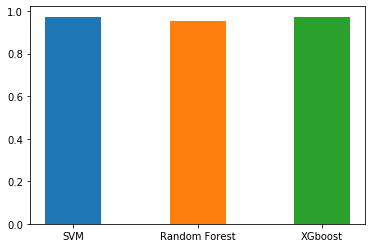

In [18]:
import matplotlib.pyplot as plt
plt.bar('SVM', svmscore, 0.45, label="num",)
plt.bar('Random Forest',rndscore, 0.45, label="num",)
plt.bar('XGboost', xgscore, 0.45, label="num")
plt.show()

总结：

1. model训练速度，XGboost > SVM > Random Forest

2. 预测速度，XGboost > Random Forest > SVM